In [1]:
import numpy as np
import matplotlib.pyplot as plt

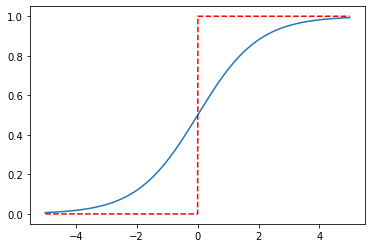

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sgn(x):
    y = []
    for i in x:
        if i >=0:
            y.append(1)
        else:
            y.append(0)
    return np.array(y)

x = np.arange(-5,5,0.01)
y = sigmoid(x)
y1 = sgn(x)
plt.plot(x,y)
plt.plot(x,y1,'r--')
plt.show()

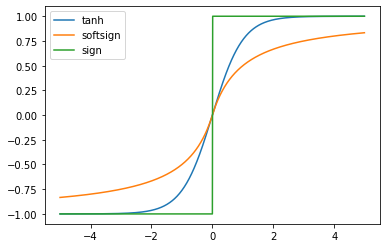

In [3]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def softsign(x):
    return x/(1+np.abs(x))
#定义一个sign函数作为对比，这个函数x<0时为-1，x>0时为1
def sign(x):
    y = []
    for i in x:
        if i >0:
            y.append(1)
        elif i == 0:
            y.append(0)
        else:
            y.append(-1)
    return np.array(y)

y2 = tanh(x)  #这里的x是之前就定义好的
y3 = softsign(x)
y4 = sign(x)
#为了更加直观，这里引入pandas进行封装
import pandas as pd
data = np.vstack((y2,y3,y4)) #将函数进行行拼接
put = pd.DataFrame(data.T,index=x,columns=['tanh','softsign','sign'])  #这里的data.T是将矩阵进行转置操作
put.plot()
plt.show()

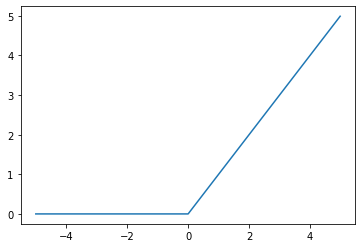

In [4]:
#ReLU函数
def relu(x):
    return np.maximum(0, x)
y5 = relu(x)
plt.plot(x,y5)
plt.show()

In [5]:
def softmax(x):
    exp_x = np.exp(x)
    exp_x_sum = np.sum(exp_x)  #求和
    return exp_x/exp_x_sum
a = np.array([0.3,2.9,4.0])
out = softmax(a)
print("输出值：",out,"\n值的和：",np.sum(out))

输出值： [0.01821127 0.24519181 0.73659691] 
值的和： 1.0


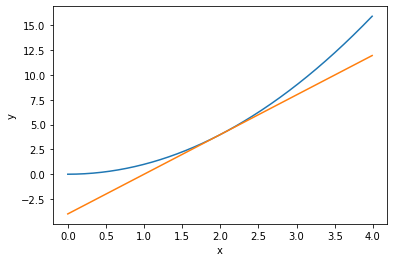

In [20]:
#求导函数
#向前差分
def forward_diff(f,x,h=1e-4):
    return (f(x+h)-f(x))/h
#中心差分
def diff(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

def fun(x):
    return x**2
x = np.arange(0,4,0.01)
f = fun(x)
#tanh函数在(2,4)处的倒数
dy = diff(fun,2)
plt.plot(x,f)
plt.plot(x,dy*(x-2)+4)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

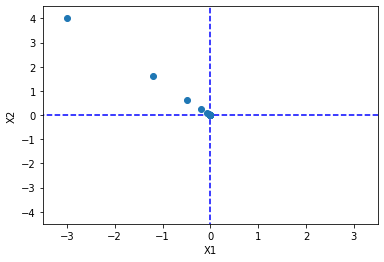

In [26]:
def gradient(f,x,h=1e-4):
    #梯度计算
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    return grad

def grad_desc(f,init_x,lr=0.01,step=100):
    x = init_x
    x_history = []  #记录历史坐标值
    for i in range(step):
        x_history.append( x.copy() ) #使用numpy的copy函数，而不是直接等于
        grad = gradient(f,x)
        x -= lr*grad
    return x,np.array(x_history)
#定义一个函数
def fun1(x):
    return x[0]**2+x[1]**2

#初始化的坐标
init_x = np.array([-3.0,4.0])
lr = 0.3  #上面默认是0.01，这里可以重新赋值
step = 20  #默认是100，这里重新赋值
x,x_history = grad_desc(fun1,init_x,lr=lr,step=step)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()